## import required packages

In [546]:
import pandas as pd # data preprocessing
import numpy as np  # computes the numerical and statistical data
from sklearn.linear_model import LinearRegression # Model to train the data
from sklearn.preprocessing import PolynomialFeatures # Model for polinomial data
from sklearn.model_selection import train_test_split # splits the dataset into train set and test set
from sklearn.metrics import mean_squared_error,r2_score # to find the error rate and accuracy scores
import matplotlib.pyplot as plt  # library helps to plot graphs
import seaborn as sns # data visualization
from fuzzywuzzy import process # finds the similarity between the texts/strings
from tabulate import tabulate # creates table format

## Read dataset

In [388]:
df=pd.read_csv('CarPrice_Assignment.csv')# read csv file
df.head() #displays first 5 records

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Preprocessing

In [389]:
# find columns with integer and float datatypes
df_list=[]
for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        df_list.append(i)

In [390]:
new_df=pd.DataFrame() # create new dataframe 

In [391]:
new_df=df[df_list] # store columns with integer and float types

In [392]:
new_df.shape # gives number of recordds and features

(205, 16)

In [394]:
#listing numeric features and categorical features
quantitative_data=['car_ID','symboling','wheelbase','carlength','carheight',
                  'curbweight','curbweight','enginesize','boreratio','stroke','compressionratio',
                 'compressionratio','peakrpm','citympg','highwaympg','price']

categorical_data=['CarName','fueltype','cylindernumber','doornumber','aspiration','carbody','drivewheel','enginelocation',
                 'enginetype','fuelsystem']

## Preprocessing of Categorical Data

In [395]:
# splitting 'CarName' variable to get only name of the car
df['CarName'] = df['CarName'].str.split(expand=True)
    
        

# change the text labels to numeric labels
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
    
        

# cylinder numbers were in words, mapped to respective numeric values  
words2numbers={'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}
df['cylindernumber']=df['cylindernumber'].map(words2numbers)
 
        

In [396]:
df['CarName']=df['CarName'].str.lower()# making all car names to be lower

In [399]:
# list of unique car names
car_names=['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
           'isuzu', 'jaguar', 'mazda', 'buick', 'mercury',
           'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
           'renault', 'saab', 'subaru', 'toyota',
           'vkswagen','volvo']

    

In [ ]:
# checking for spellings, string similarity 
for carnm in car_names:
    matches=process.extract(carnm, df['CarName'],limit=df.shape[0])
    for potential_matches in matches:
        if potential_matches[1]>85:
            match_car=df['CarName']==potential_matches[0]
            df.loc[match_car,'CarName']=carnm
    print(df['CarName'].unique())       

In [404]:
df.loc[df['CarName']=='vw']='vkswagen' # replacing 'vw' by 'vkswagen'

In [401]:
df.loc[df['CarName']=='porcshce']='porsche' # replacing 'porcshce' by 'porsche'

In [410]:
#converting all categoral features from object tocategory type
for each_category in categorical_data:
    df[each_category]=df[each_category].astype('category')
    

In [411]:
#top 10 cars
top_10_cars=df['CarName'].value_counts().nlargest(10)
top_10_cars

toyota        32
nissan        18
mazda         15
honda         13
mitsubishi    13
subaru        12
vkswagen      12
peugeot       11
volvo         11
dodge          9
Name: CarName, dtype: int64

## Analysis of Categorical Data

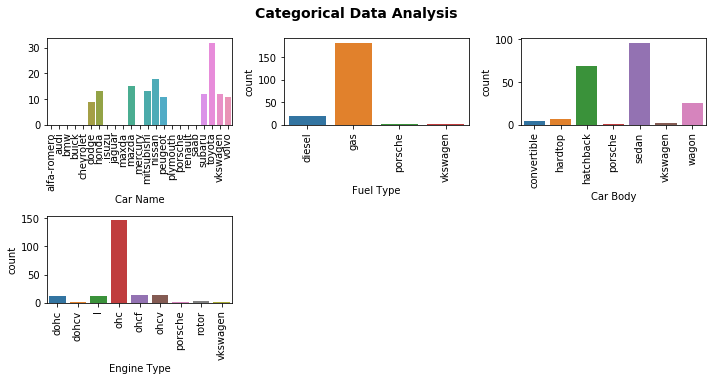

In [412]:

plt.figure(figsize=(10,5))#sets the figure size 
plt.suptitle('Categorical Data Analysis',fontsize=14,fontweight='bold',y=1.05)# sets the unique title for whole plots


plt.subplot(2,3,1) # create subplots with 1 row, 3 columns and last argument represents figure 1
sns.barplot(top_10_cars.index,top_10_cars.values) # plot top 10 cars
plt.xticks(rotation=90) # sets the x labels at 90 degree angle
plt.xlabel('Car Name') # sets the x-axis name 

plt.subplot(2,3,2)
sns.countplot(df['fueltype'])# plots higher number fuel type
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')

plt.subplot(2,3,3)
sns.countplot(df['carbody'])# plots mostly prefered car type
plt.xticks(rotation=90)
plt.xlabel('Car Body')


plt.subplot(2,3,4)
sns.countplot(df['enginetype'])# plots mostly prefered fuel type
plt.xticks(rotation=90)
plt.xlabel('Engine Type')
plt.tight_layout() 

## Inferences

1. Toyota is highly prefered car.
2. Gas fuel type is more in use than Diesel.
3. Sedan is highly prefered.
4. ohc engine type is high.

## Quantitative Analysis

In [414]:
# Cars with risk factor
df.groupby(['CarName'])['CarName','symboling'].max()

/home/becode/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,CarName,symboling
CarName,,
alfa-romero,alfa-romero,3.0
audi,audi,2.0
bmw,bmw,2.0
buick,buick,3.0
chevrolet,chevrolet,2.0
dodge,dodge,3.0
honda,honda,2.0
isuzu,isuzu,2.0
jaguar,jaguar,0.0


## Normalization

In [418]:
from sklearn.preprocessing import StandardScaler # standardize the data in (-1,1) range
from sklearn.preprocessing import MinMaxScaler # standardize the data in (0,1) range

In [419]:
standrd=MinMaxScaler(feature_range=(0,1)) # creates MinMaxScaler object

In [420]:
fitteddata=standrd.fit_transform(new_df) # fit and transform the data to the model

In [421]:
norm_data=pd.DataFrame(fitteddata,columns=new_df.columns) # create a dataframe with standardized data

## Feature Selection

In [422]:
# select independent features excluding target variable and convert to array 
X=norm_data.iloc[:,0:15].to_numpy() 
# select target variable and convert to array and reshape to 2D array
y=norm_data.iloc[:,-1].to_numpy().reshape(-1,1)

In [423]:
from sklearn.feature_selection import SelectKBest # selects top 10 best features
from sklearn.feature_selection import f_classif # calcultes the score to select the features

In [424]:
featurebest=SelectKBest(score_func=f_classif,k=10) # create SelectKBest object

In [ ]:
fitteddata=featurebest.fit(X,y) # fit model to data

In [426]:
dfscores=pd.DataFrame(fitteddata.scores_) # create a dataframe to keep data scores
dfcols=pd.DataFrame(norm_data.iloc[:,0:15].columns) # get columns from original dataset

In [427]:
featurescores=pd.concat([dfcols,dfscores],axis=1) # merge both scores and columns dataframes

In [428]:
featurescores.columns=['Specs','Score'] # assign colimns with new names

In [429]:
featurescores.nlargest(10,'Score') # display the top 10 best features

,Specs,Score
7,enginesize,40.738174
6,curbweight,36.893341
4,carwidth,18.604206
11,horsepower,17.351764
3,carlength,17.047390
13,citympg,10.454953
2,wheelbase,10.272157
14,highwaympg,7.986910
12,peakrpm,5.316675
5,carheight,2.674096


In [430]:
#create dataframe for selected features frol feature selection model 
new_data2=pd.DataFrame()
new_data2=norm_data[['enginesize','curbweight','carwidth','horsepower', 'carlength', 'citympg', 'wheelbase', 'highwaympg', 'peakrpm', 'carheight','price']]

## Correlation of Features

In [ ]:
#to check the relationship between the features
sns.pairplot(new_data2)

In [ ]:
# finds the positive correlation between the features for feature selection
sns.heatmap(new_data2.corr(),annot=True)

## Linear Regression Model for traning the data and checking the Accuracy

In [531]:
from sklearn.linear_model import LinearRegression # Linear Regression class
from sklearn.metrics import mean_squared_error,r2_score # metrics for findind error rate and accuracy

In [532]:
X_new=new_data2.iloc[:,0:10]#.to_numpy() # independentfeatures
y_new=new_data2.iloc[:,-1]#.to_numpy().reshape(-1,1) #  dependent feature

In [533]:
lreg=LinearRegression() # creates object of LinearRegression

In [534]:
lreg.fit(X_new,y_new) # fits the data to the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [535]:
linr_acc=lreg.score(X_new,y_new) # finds the accuracy 

In [473]:
y_pred=lreg.predict(X_new)

In [475]:
# find the intercept and coefficients of linear line
lreg.intercept_,lreg.coef_

(-0.24776490597806622,
 array([ 0.66386868,  0.25061842,  0.18080925,  0.19691266, -0.13823841,
        -0.10739454,  0.03821056,  0.14948983,  0.12283341,  0.07058361]))

In [476]:
# creating a dataframe for each feature with their coefficients to check how these coefficients are affecting the price attribute
coeff_df = pd.DataFrame(lreg.coef_.T,  new_data2.iloc[:,0:10].columns,columns=['Coefficient'])
coeff_df

,Coefficient
enginesize,0.663869
curbweight,0.250618
carwidth,0.180809
horsepower,0.196913
carlength,-0.138238
citympg,-0.107395
wheelbase,0.038211
highwaympg,0.149490
peakrpm,0.122833
carheight,0.070584


In [477]:
df_new=pd.DataFrame({'Actual':y_new,'Predicted':y_pred})# create dataframe to display actual and predicted values

In [478]:
df_new

,Actual,Predicted
0,0.207959,0.150066
1,0.282558,0.150066
2,0.282558,0.313116
3,0.219254,0.157857
4,0.306142,0.272501
...,...,...
200,0.291123,0.330685
201,0.345738,0.371467
202,0.406311,0.433353
203,0.430763,0.316939


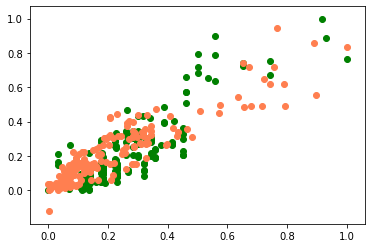

In [507]:
# graph to show the variance of actual to predicted samples
plt.scatter(X_new['enginesize'],y_new,c='green')
plt.scatter(y_new,y_pred,c='coral')


## Polynomial Regression

In [536]:
from sklearn.preprocessing import PolynomialFeatures # import Polynomial Regression library

In [537]:
#create Polynomial Regression object and fit and transform the samples
poly=PolynomialFeatures(degree=2)
poly_x=poly.fit_transform(X_new,y_new)

In [538]:
lreg.fit(poly_x,y_new)# fit the polynomial data and original y to linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [539]:
poly_acc=lreg.score(poly_x,y_new)# finds the accuracy for polynomial data

In [544]:
# creating dataframe for different models and their accuracy value
accuracy_data=pd.DataFrame({'Models':['Linear_Regression','Polynomial_Regression'],'Accuracy':[linr_acc,poly_acc]}).set_index('Models')

In [545]:
#displays the table
print(tabulate(accuracy_data, tablefmt="pipe", headers="keys"))

| Models                |   Accuracy |
|:----------------------|-----------:|
| Linear_Regression     |   0.831422 |
| Polynomial_Regression |   0.949341 |


## Inferences

1. It is shown that Polynomial Regression model perfoms better than Linear Model.
2. Polynomial Model with degree 2 gives better accuracy than linear model.

## Matplotlib for Visualization

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # plots 3d graphs
%matplotlib notebook # displays the interactive graphs in notebook 

In [ ]:
#plot a graph for price with respect to engine size and horse power
fig=plt.figure(1)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_new[:,0],X_new[:,3],y_new,c=X_new[:,1])

ax.set_xlabel('engine size')
ax.set_ylabel('horse power')
ax.set_zlabel('price')
ax.set_title('Price vs Engine size and Horse power')

In [ ]:
from matplotlib.animation import FuncAnimation # creates an animation of plotted graph

In [ ]:
bits = 8
fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor((0.5, 0.5, 0.5))
gradient = np.linspace(0, 1, 2**bits)
X,Y,Z = np.meshgrid(gradient, gradient, gradient)

colors=np.stack((X_new[:,0].flatten(),X_new[:,1].flatten(),X_new[:,4].flatten()),axis=1)
ax.scatter(X_new[:,0],X_new[:,3],y_new,alpha=1.0,s=100./2,c=colors,marker='o',linewidth=0)
ax.set_xlabel('engine size')
ax.set_ylabel('horse power')
ax.set_zlabel('price')
ax.set_title('Price vs Engine size and Horse power')

In [ ]:
def update(i, fig, ax):
    """
    function update: displays the animation for scattered plot

    param i: number of frames

    param fig: creates a figure on which the plot is drafted

    param ax: plots the scatter and set the labels for x-axis, y-axis and z-axis
    return: returns figure and plot
    """
    ax.view_init(elev=20., azim=i)
    return fig, ax

#FuncAnimation is a class that takes figure, frames and update function to create an animation 
anim = FuncAnimation(fig, update, frames=np.arange(
    0, 360, 2), repeat=True, fargs=(fig, ax))
# saves the animated graph in 'gif' format
anim.save('car_price_cube.gif', dpi=80, writer='imagemagick', fps=24)